<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_7/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import scipy.stats as stats
import math
import statsmodels.api as sm
import statistics

# Sampling and Sampling Distributions

In this module, we will build upon the previous lesson on the normal distribution and dive into the details of sampling distributions, such as how we measure the sample mean and leverage the central limit theorem to make inferences about a population. We will apply these concepts to develop a control chart as it relates to Quality Control.

## Sampling Methods

### Simple Random Sample

In [ ]:
# Set random seed
np.random.seed(42)

The following dataset will be used to explore methods of sampling, such as random sampling and stratified random sampling. 


## Which resume attributes drive job callbacks?

https://vincentarelbundock.github.io/Rdatasets/doc/openintro/resume.html

This experiment data comes from a study that sought to understand the influence of race and gender on job application callback rates. The study monitored job postings in Boston and Chicago for several months during 2001 and 2002 and used this to build up a set of test cases. Over this time period, the researchers randomly generating resumes to go out to a job posting, such as years of experience and education details, to create a realistic-looking resume. They then randomly assigned a name to the resume that would communicate the applicant's gender and race. The first names chosen for the study were selected so that the names would predominantly be recognized as belonging to black or white individuals. For example, Lakisha was a name that their survey indicated would be interpreted as a black woman, while Greg was a name that would generally be interpreted to be associated with a white male.

In [ ]:
df = sm.datasets.get_rdataset("resume", "openintro").data

In [ ]:
df.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


In [ ]:
df.columns

Index(['job_ad_id', 'job_city', 'job_industry', 'job_type',
       'job_fed_contractor', 'job_equal_opp_employer', 'job_ownership',
       'job_req_any', 'job_req_communication', 'job_req_education',
       'job_req_min_experience', 'job_req_computer', 'job_req_organization',
       'job_req_school', 'received_callback', 'firstname', 'race', 'gender',
       'years_college', 'college_degree', 'honors', 'worked_during_school',
       'years_experience', 'computer_skills', 'special_skills', 'volunteer',
       'military', 'employment_holes', 'has_email_address', 'resume_quality'],
      dtype='object')

Take a simple random sample of 100 participants, what is the probability that the gender is male? 

First calculate probability of entire population.

In [ ]:
df.gender.value_counts()

f    3746
m    1124
Name: gender, dtype: int64

In [ ]:
print(f"P(Is Male) = {round(100*df[df['gender'] == 'm'].shape[0]/len(df),2 )}%")

P(Is Male) = 23.08%


Make sure to set the random state for reproducible work, this is analogous to the set seed.

In [ ]:
rand_sample = df.sample(100, replace=False)

In [ ]:
rand_sample.shape

(100, 30)

In [ ]:
rand_sample.gender.value_counts()

f    77
m    23
Name: gender, dtype: int64

In [ ]:
print(f"P(Is Male) = {round(100*rand_sample[rand_sample['gender'] == 'm'].shape[0]/len(rand_sample),2 )}%")

P(Is Male) = 23.0%


Because these proportions are the same, we can say the sample represents the population wrt gender breakdown.

## Stratified Random Sampling

In [ ]:
df.race.value_counts()

white    2435
black    2435
Name: race, dtype: int64

In [ ]:
df.head(1)

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low


In [ ]:
df.groupby('race', group_keys=False)['resume_quality'].value_counts()

race   resume_quality
black  high              1223
       low               1212
white  high              1223
       low               1212
Name: resume_quality, dtype: int64

In [ ]:
strat_df = df.groupby('race', group_keys=False).apply(lambda x: x.sample(10, random_state=42))

In [ ]:
strat_df.groupby('race', group_keys=False).resume_quality.value_counts()

race   resume_quality
black  high              5
       low               5
white  low               8
       high              2
Name: resume_quality, dtype: int64

This stratefied sampling comes to importance when developing ML models that are built using train/test split. 

Back to the lecture.

# The Expected Value and the Standard Error of the Sample Mean

### Example 7.3

Consider how ‘shrinkflation’ is changing the size/weight of their products, Doritos chips claims each bag to weigh 16 ounces. However, there is likely to be a inconsistency due to how the chips are packaged, resulting in a standard deviation of 0.8 ounces.

Population mean μ = 16 and the population standard deviation σ = 0.8

Comment on the computed probabilities.

In [ ]:
# define the inputs
mu = 16
std = 0.8

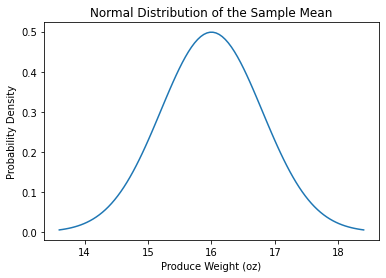

In [ ]:
# plot normal distribution
x = np.linspace(mu - 3*std, mu + 3*std, 100) # distribution of 100 samples with mean +- 3 standard deviations
# using the stats package to create a probability density function given x
plt.plot(x, stats.norm.pdf(x, mu, std))
plt.title('Normal Distribution of the Sample Mean')
plt.xlabel('Produce Weight (oz)')
plt.ylabel('Probability Density')
plt.show()

What is the probability that a randomly selected bag of chips is less than 15.5 ounces?



In [ ]:
stats.norm(mu, std).cdf(15.5)

0.26598552904870054

What is the probability that 2 randomly selected bags of chips average less than 15.5 ounces?

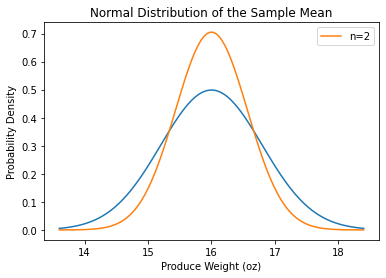

In [ ]:
# plot normal distribution
x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, stats.norm.pdf(x, mu, std))
plt.plot(x, stats.norm.pdf(x, mu, std/math.sqrt(2)), label='n=2')
plt.title('Normal Distribution of the Sample Mean')
plt.xlabel('Produce Weight (oz)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [ ]:
stats.norm(mu, std/math.sqrt(2)).cdf(15.5)

0.188379558905791

What is the probability that 4 randomly selected bags average less than 15.5 ounces?

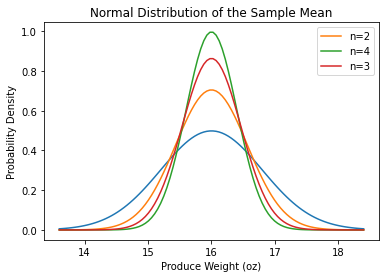

In [ ]:
# plot normal distribution
x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, stats.norm.pdf(x, mu, std))
plt.plot(x, stats.norm.pdf(x, mu, std/math.sqrt(2)), label='n=2')
plt.plot(x, stats.norm.pdf(x, mu, std/math.sqrt(4)), label='n=4')
plt.plot(x, stats.norm.pdf(x, mu, std/math.sqrt(3)), label='n=3')
plt.xlabel('Produce Weight (oz)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of the Sample Mean')
plt.legend()
plt.show()

In [ ]:
stats.norm(mu, std/math.sqrt(4)).cdf(15.5)

0.10564977366685535

back to the lecture

# Quality Control Charts

This demo has examples for all types of control charts: https://towardsdatascience.com/quality-control-charts-guide-for-python-9bb1c859c051

The below code was taken from the demo in the link above. We will reuse parts of the structure to answer questions from the textbook.

### x-bar chart and R chart

Used to monitor the mean and variation of a process based on samples taken in a given time. The sample size n must be greater than 1 and less than 11.

Group 5 out of mean control limits!
All points within control limits.


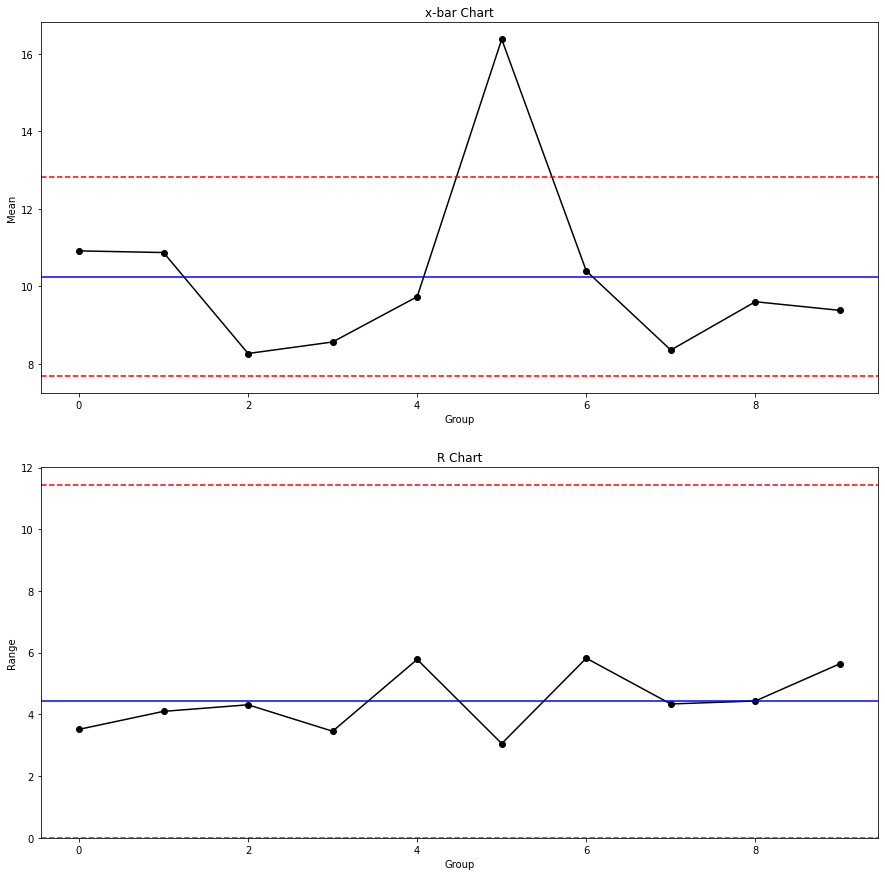

In [36]:
# Create dummy data
x = np.array([list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=17, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5))])
        
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((2.574*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((0*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+0.577*statistics.mean(r) or group < statistics.mean(x_bar)-0.577*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > 2.574*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

### Example 7.9

Manufacturer produces one-gallon jugs of milk, every two hours the company samples 25 jugs and calculates the following sample mean filling weights (in ounces). Assume that when the machine is properly operating, mu = 128, sigma = 2. And that filling weights follow the normal distribution. 

Is the machine operating properly?

In [37]:
mu = 128
std = 2

x = [128.7, 128.4, 128, 127.8, 127.5, 126.9]

Construct the x̄ chart, the centerline is the mean when the process is in control. Calculate the UCL and LCL as 3 standard deviations above and below the mean.

In [38]:
# calculate the UCL and LCL

def calc_limits(mu, std, x_values):
  """
  Takes the expected mean and standard deviation, in addition to the sample of values
  Calculates 3 standard deviations above and below the mean multiplied by the
  standard error (std/sqrt(n))
  Returns: UCL, LCL values
  """
  # n is the number of sample taken, or the length of our list
  n = len(x_values)
  # calc upper limit
  UCL = mu + 3*(std/math.sqrt(n))
  # calc lower limit
  LCL = mu - 3*(std/math.sqrt(n))
  print(f"From a sample of {n}, the UCL is {round(UCL,2)}, the LCL is {round(LCL,2)}")

  # how many values are above or below?
  for i in x_values:
    if i > UCL or i < LCL:
      print(f'Sample value of {i} falls out of control.')
    else:
      print('Sample in control')
  return UCL, LCL

In [39]:
UCL, LCL = calc_limits(mu, std, x)

From a sample of 6, the UCL is 130.45, the LCL is 125.55
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control


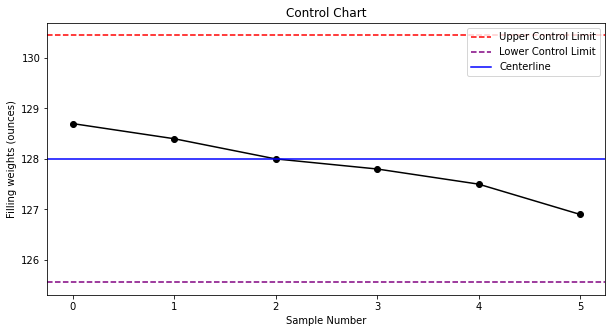

In [40]:
# plot on a control plot
# x-bar chart
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, linestyle='-', marker='o', color='black')
plt.axhline(UCL, color='red', linestyle='dashed', label="Upper Control Limit")
plt.axhline(LCL, color='purple', linestyle='dashed', label="Lower Control Limit")
plt.axhline(mu, color='blue', label='Centerline')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Filling weights (ounces)')
plt.title('Control Chart')
plt.show()


The sample means are consitently decreasing although remaining within the limits. This might indicate a different drift occuring that might be problematic. 

Example 7.11

Manufacturer of 4-liter cans of paint. For quality control a random sample of 4 cans are taken each hour and the amount of paint is measured. Past experience has resulted in a standard deviation of .25. The expected value (or the mean) is 4. 

Use the data from the example to measure if everything is under control.

In [41]:
mu = 4
std = .25

In [42]:
df = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch07_Data_Files.xlsx",
                   sheet_name="Paint")

In [47]:
df.head()

,Sample,Obs. 1,Obs. 2,Obs. 3,Obs. 4,Sample Mean,LCL,Centerline,UCL,x_bar
0,1,4.175,3.574,3.795,4.211,3.939,3.625,4,4.375,3.93875
1,2,4.254,4.012,4.119,3.866,4.063,3.625,4,4.375,4.06275
2,3,4.096,3.525,3.576,4.061,3.815,3.625,4,4.375,3.81450
3,4,3.966,4.499,4.271,3.705,4.110,3.625,4,4.375,4.11025
4,5,3.672,4.488,3.836,3.723,3.930,3.625,4,4.375,3.92975


What if the Sample Mean wasn't provided? Let's calculate ourselves and add as a new column

In [45]:
df.shape

(25, 9)

In [44]:
df.columns

Index(['Sample', 'Obs. 1', 'Obs. 2', 'Obs. 3', 'Obs. 4', 'Sample Mean', 'LCL',
       'Centerline', 'UCL'],
      dtype='object')

In [46]:
# calculate mean across the observation columns, specify axis to be row-wise, else it will be by column
df['x_bar'] = df[['Obs. 1', 'Obs. 2', 'Obs. 3', 'Obs. 4']].mean(axis=1)

Let's plot this to see the distribution of sample means.

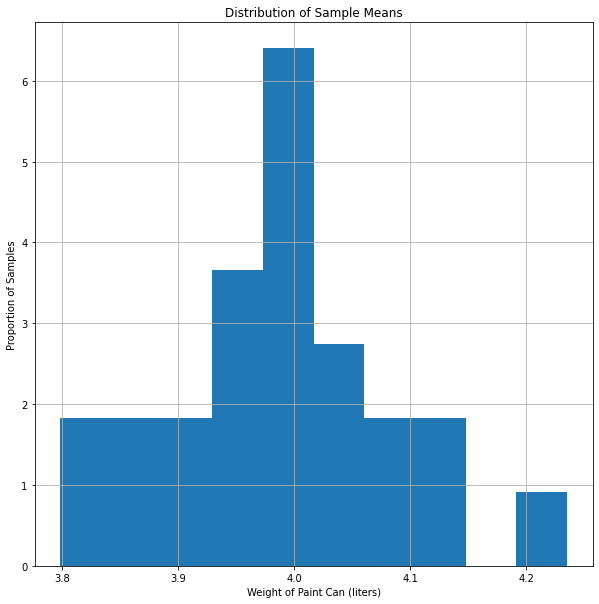

In [48]:
fig, ax = plt.subplots( figsize=(10,10))
df.x_bar.hist(density=True)
plt.title('Distribution of Sample Means')
plt.xlabel('Weight of Paint Can (liters)')
plt.ylabel('Proportion of Samples')
plt.show()

The distribution looks normal with a center point at 4 liters which is the average. 

In [ ]:
df.shape

Use our function to calculate the UCL and LCL

In [50]:
UCL, LCL = calc_limits(mu, std, df['x_bar'])

From a sample of 25, the UCL is 4.15, the LCL is 3.85
Sample in control
Sample in control
Sample value of 3.8145000000000002 falls out of control.
Sample in control
Sample in control
Sample in control
Sample value of 4.2355 falls out of control.
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control
Sample value of 3.79825 falls out of control.
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control
Sample in control


In [ ]:
UCL, LCL

We can't use the same function because the format of this dataframe is a bit different. It calculates a sample of 4 across each observation. So the length of the x_bar list is 25 and not 4.

In [51]:
def simple_UCL_LCL(mu, std, n):
  """
  Function that simply calculates the needed formula for UCL and LCL
  """
  UCL = n + (3*std/math.sqrt(mu))
  LCL = n - (3*std/math.sqrt(mu))
  return UCL, LCL

In [52]:
UCL, LCL = simple_UCL_LCL(mu, std, 4)

In [53]:
UCL, LCL

(4.375, 3.625)

In [54]:
df.head(1)

,Sample,Obs. 1,Obs. 2,Obs. 3,Obs. 4,Sample Mean,LCL,Centerline,UCL,x_bar
0,1,4.175,3.574,3.795,4.211,3.939,3.625,4,4.375,3.93875


In [55]:
UCL == 4.375

True

Let's plot again with these lines to visualize what the distribution tails would need to look like to exceed control.

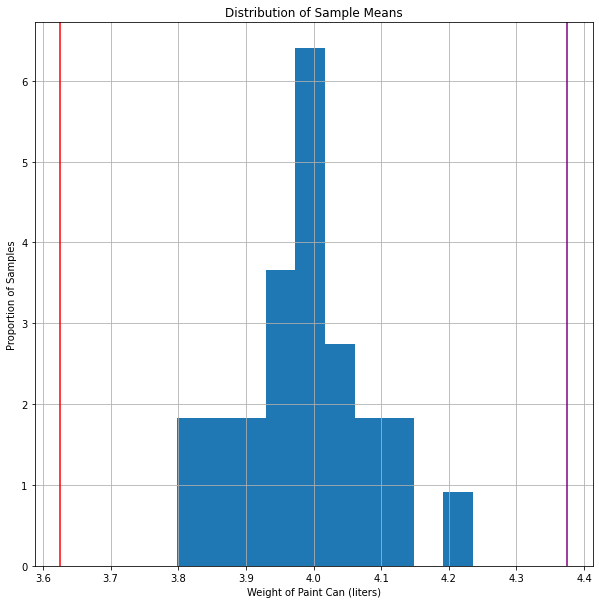

In [56]:
fig, ax = plt.subplots( figsize=(10,10))
df.x_bar.hist(density=True)
# plot LCL + UCL
plt.axvline(x=LCL, color='r', label='Lower Control Limit')
plt.axvline(x=UCL, color='purple', label='Upper Control Limit')
plt.title('Distribution of Sample Means')
plt.xlabel('Weight of Paint Can (liters)')
plt.ylabel('Proportion of Samples')
plt.show()

We see the 3 standard deviations above and below the mean has a wide gap compared with the sample values. Therefore this is in control.

The example in the textbook provided the LCL and UCL for us. 

In [57]:
LCL = df['LCL'].unique()[0]

In [58]:
UCL = df['UCL'].unique()[0]

In [59]:
LCL, UCL

(3.625, 4.375)

In [60]:
mu = df['Centerline'].unique()[0]

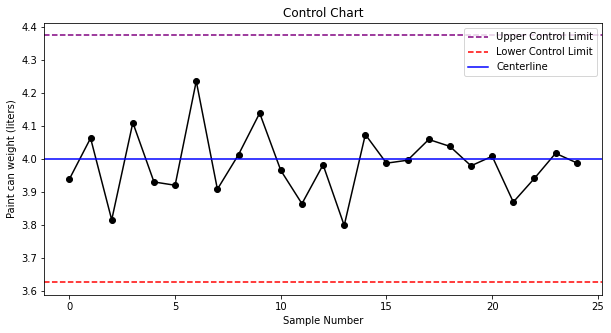

In [61]:
# plot on a control plot
# x-bar chart
fig, ax = plt.subplots( figsize=(10,5))
plt.plot(df['Sample Mean'], linestyle='-', marker='o', color='black')
plt.axhline(UCL, color='purple', linestyle='dashed', label="Upper Control Limit")
plt.axhline(LCL, color='red', linestyle='dashed', label="Lower Control Limit")
plt.axhline(mu, color='blue', label='Centerline')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Paint can weight (liters)')
plt.title('Control Chart')
plt.show()